<a href="https://colab.research.google.com/github/GeorgeGlennon/Part-II-Theoretical-Practical/blob/main/THE_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

#Function that returns eigenvalues
def get_eigenvalues(M):
  evals, evecs = np.linalg.eig(M)
  return evals

#Function that returns eigenvectors
def get_eigenvectors(M):
  evals, evecs = np.linalg.eig(M)
  return evecs

a = 0
b = -1

def LinearHuckel(n):

  LinearHuckel = np.zeros((n, n))

  #Setting diagonal elements
  for i in range(n):
    LinearHuckel[i,i] = a / 2

  #Setting off-diagonal elements
  #for i in range(n-1):
    #LinearHuckel[i, i+1] = b
    #LinearHuckel[i+1,i] = b

  LinearHuckel[0,1] = LinearHuckel[1,2] = LinearHuckel[2,3] = b
  LinearHuckel += np.transpose(LinearHuckel)

  for i in sorted([round(evals, 10) for evals in get_eigenvalues(LinearHuckel)], reverse = False):
    print("Energy: \u03B1 +", i, "\u03B2")

#Benzene

def Benzene():

  BenzeneHuckel = np.zeros((6, 6))

  #Setting diagonal elements
  for i in range(6):
    BenzeneHuckel[i,i] = a / 2

  #Setting off-diagonal elements
  for i in range(5):
    BenzeneHuckel[i, i+1] = b

  #Setting corner elements
  BenzeneHuckel[0,6-1] = b
  BenzeneHuckel += np.transpose(BenzeneHuckel)

  for i in sorted([round(evals, 10) for evals in get_eigenvalues(BenzeneHuckel)], reverse = False):
    print("Energy: \u03B1 +", i, "\u03B2")


#Benzene derivatives

def BenzeneDerviatives(para):

  alpha, beta, alpha2, beta2, n, name = para

  BenzeneHuckel = np.zeros((n, n))

  #Setting diagonal elements
  for i in range(6):
    BenzeneHuckel[i,i] = a / 2

  #Setting off-diagonal elements
  for i in range(5):
    BenzeneHuckel[i, i+1] = b

  #Setting corner elements
  BenzeneHuckel[0,6-1] = b

  #Adding in the pertubations
  BenzeneHuckel[6,6] = alpha/2
  BenzeneHuckel[5,6] = beta
  if n == 8:
    BenzeneHuckel[7,7] = alpha2/2
    BenzeneHuckel[6,7] = beta2

  BenzeneHuckel += np.transpose(BenzeneHuckel)

  eigenvalues = sorted([round(evals, 10) for evals in get_eigenvalues(BenzeneHuckel)], reverse=True)
  #for i in eigenvalues:
    #print("Energy: \u03B1 +", i*-1, "\u03B2")

  return eigenvalues, name, n, BenzeneHuckel



Aniline = a + b, b,0 ,0 , 7, "Aniline"
Phenol = a + 2*b, 1.5*b,0 ,0 , 7, "Phenol"
Bromobenzene = a, b/2,0 ,0 , 7, "Bromobenzene"
Benzaldehyde = a, b, a + 2*b, 1.5*b, 8, "Benzaldehyde"
Benzonitrile = a, b, a + b, b, 8, "Benzonitrile"
Styrene = a, b, a, b, 8, "Styrene"

molecule_list = [Bromobenzene, Aniline, Phenol, Benzaldehyde, Benzonitrile, Styrene]

for molecule in molecule_list:
  print("###Energies for", molecule[5],"###")
  eigenvalues, name, n, Huckel = BenzeneDerviatives(molecule)
  print("\n")


###Energies for Bromobenzene ###


###Energies for Aniline ###


###Energies for Phenol ###


###Energies for Benzaldehyde ###


###Energies for Benzonitrile ###


###Energies for Styrene ###




In [13]:
def HOMOenergy():

  """A function that returns the energy of the HOMO"""

  index = int(n/2)
  #print("The energy of the HOMO is \u03B1 +", eigenvalues[index], "\u03B2 for "+name)
  return eigenvalues[index]

for molecule in molecule_list:
  eigenvalues, name, n, Huckel = BenzeneDerviatives(molecule)
  HOMOenergy()

#Is this a reasonable predictor?
#How does it compare to actual reactivity?

In [ ]:
def MODiagram(eigvals, name):
    """
    Plots a Molecular Orbital (MO)
    """
    # Sorting eigenvalues (energy levels) from highest to lowest
    print(eigvals)
    eigvals = sorted(eigvals, reverse=True)
    print(eigvals)

    # Define x positions for levels (all at x=0)
    x_center = 0
    level_width = 0.4  # Width of each energy level line

    # Find HOMO-LUMO levels (assuming a filled π-system)
    n_electrons = len(eigvals) // 2  # Half-filled system
    HOMO_index = 4   # Last occupied level
    LUMO_index = 3 # First unoccupied level

    plt.figure(figsize=(3, 6))  # Adjust size for a vertical diagram

    # Plot each energy level as a horizontal line
    for i, energy in enumerate(eigvals):
        color = 'black'  # Default color
        label = None

        # Highlight HOMO and LUMO
        if i == HOMO_index:
            color = 'blue'
            label = "HOMO"
        elif i == LUMO_index:
            color = 'red'
            label = "LUMO"

        plt.plot([x_center - level_width / 2, x_center + level_width / 2],
                 [energy, energy], color=color, linewidth=2)

        # Add text labels for HOMO/LUMO
        if label:
            plt.text(x_center + 0.5, energy, label, fontsize=10, verticalalignment='center')

    # Labels and styling
    plt.xlabel("")
    plt.xticks([])  # Remove x-axis labels
    plt.ylabel("Energy (β units)")
    plt.title("Hückel MO Diagram for "+name)
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

for molecule in molecule_list:
  eigenvalues, name, n, Huckel = BenzeneDerviatives(molecule)
  MODiagram(eigenvalues, name)

In [17]:
from tabulate import tabulate

def population(M,e):

  """A function that calculates the electron population for each atom"""

  eigenvectors = get_eigenvectors(M)
  eigenvalues = get_eigenvalues(M)
  sum = np.zeros(len(eigenvectors))

  # Sort eigenvalues and vectors
  sorted_indices = np.argsort(get_eigenvalues(M))
  sorted_eigenvalues = eigenvalues[sorted_indices]
  sorted_eigenvectors = get_eigenvectors(M)[:, sorted_indices]

  for i in range(int(e/2)):
    for j in range(len(sorted_eigenvectors[i])):
      sum[j] += 2* (sorted_eigenvectors[j][i]* sorted_eigenvectors[j][i])

  return sum

#Styrene HOMO
eigenvalues, name, n, Huckel = BenzeneDerviatives(Styrene)
q = get_eigenvectors(Huckel)
StyreneHOMO = (2*(q[0][3])**2, 2*(q[2][3])**2, 2*(q[1][3])**2)

#Creation of a table
headers = ["Molecule", "HOMO energy", "Ortho", "Para", "Meta"]
data = []
for molecule in molecule_list:
  eigenvalues, name, n, Huckel = BenzeneDerviatives(molecule)
  q = population(Huckel, 8)
  energy = (f"\u03B1 + {HOMOenergy()*-1}\u03B2")
  data.append([name,energy, q[0], q[2], q[1]])

data.append(["Styrene HOMO", data[5][1], StyreneHOMO[0], StyreneHOMO[1], StyreneHOMO[2]])

print(tabulate(data, headers=headers, tablefmt="pipe"))

| Molecule     | HOMO energy       |    Ortho |     Para |      Meta |
|:-------------|:------------------|---------:|---------:|----------:|
| Bromobenzene | α + 0.0β          | 1.05263  | 1.05263  | 1         |
| Aniline      | α + 0.504284231β  | 1.08854  | 1.07158  | 0.996604  |
| Phenol       | α + 0.5783095897β | 1.12074  | 1.09129  | 0.994434  |
| Benzaldehyde | α + 1.0β          | 0.930328 | 0.941354 | 1.00231   |
| Benzonitrile | α + 1.0β          | 0.936616 | 0.926217 | 1.02629   |
| Styrene      | α + 0.6621534469β | 1        | 1        | 1         |
| Styrene HOMO | α + 0.6621534469β | 0.189366 | 0.310634 | 0.0340491 |


| Molecule           |   HOMO - LUMO gap (β units) |
|:-------------------|----------------------------:|
| Ancene of length 1 |                    2        |
| Ancene of length 2 |                    1.23607  |
| Ancene of length 3 |                    0.828427 |
| Ancene of length 4 |                    0.589926 |
| Ancene of length 5 |                    0.439374 |


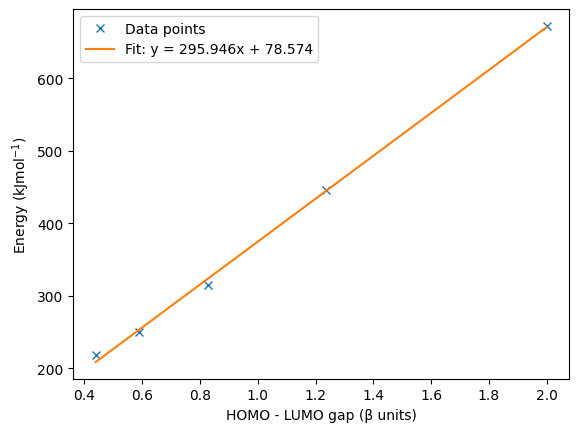

This linear regression returned a value for β of: 295.946 ± 6.330 kJmol^-1


In [19]:
from scipy import constants
from scipy.stats import linregress

#Linear Ancenes
def Ancene(n):

  """A function to build a general ancene matrix"""

  BenzeneHuckel = np.zeros((4*n+2, 4*n+2))

  #Setting diagonal elements
  for i in range(4*n+2):
    BenzeneHuckel[i,i] = a / 2

  #Setting off-diagonal elements
  for i in range(5):
    BenzeneHuckel[i, i+1] = b

  if n > 1:
    for z in range(1,n):
      for i in range(3):
        BenzeneHuckel[4*z+2+i, 4*z+3+i] = b

  #Setting corner elements for benzene
  BenzeneHuckel[0,5] = b
  if n > 1:
    BenzeneHuckel[4, 6] = b
    BenzeneHuckel[5,9] = b

  #Setting bridges
  if n > 1:
    for z in range(2,n):
      BenzeneHuckel[4*z-1, 4*z+2] = b
      BenzeneHuckel[4*z, 4*z+5] = b

  BenzeneHuckel += np.transpose(BenzeneHuckel)

  eigenvalues = sorted([round(evals, 10) for evals in get_eigenvalues(BenzeneHuckel)], reverse=False)

  HOMOLUMOgap = eigenvalues[2*n+1] - eigenvalues[2*n]

  return HOMOLUMOgap, eigenvalues

headers = ["Molecule", "HOMO - LUMO gap (\u03B2 units)"]
data = []
gaps = []
for n in range(1,6):
  gap, eigenvalues = Ancene(n)
  name = "Ancene of length " + str(n)
  data.append([name, gap])
  gaps.append(gap)
print(tabulate(data, headers=headers, tablefmt="pipe"))

wavelength = [178,268,380,480,549]
energies = []
for i in wavelength:
  energies.append((constants.N_A*constants.h*constants.c*0.001) / (i*10**-9))

#Linear regression
slope, intercept, r_value, p_value, std_err = linregress(gaps, energies)
y_fit = np.linspace(min(gaps), max(gaps), 100)
x_fit = slope * y_fit + intercept

#Graph plotting
plt.plot(gaps, energies, "x", label="Data points")
plt.plot(y_fit, x_fit, "-", label=f"Fit: y = {slope:.3f}x + {intercept:.3f}")
plt.xlabel("HOMO - LUMO gap (\u03B2 units)")
plt.ylabel("Energy (kJmol$^{-1}$)")
plt.legend()
plt.show()

print(f"This linear regression returned a value for \u03B2 of: {slope:.3f} ± {std_err:.3f} kJmol^{-1}")

In [20]:
#Clar's rule claculations
#Anthracene is

def Phenanthrene():

  """A function to build a phenanthrene matrix"""

  BenzeneHuckel = np.zeros((4*3+2, 4*3+2))

  #Setting diagonal elements
  for i in range(4*3+2):
    BenzeneHuckel[i,i] = a / 2

  #Setting off-diagonal elements
  for i in range(5):
    BenzeneHuckel[i, i+1] = b

  for z in range(1,3):
    for i in range(3):
      BenzeneHuckel[4*z+2+i, 4*z+3+i] = b

  #Setting corner elements for benzene
  BenzeneHuckel[0,5] = b
  BenzeneHuckel[4, 6] = b
  BenzeneHuckel[5,9] = b
  BenzeneHuckel[7,10] = b
  BenzeneHuckel[6,13] = b

  BenzeneHuckel += np.transpose(BenzeneHuckel)

  eigenvalues = sorted([round(evals, 10) for evals in get_eigenvalues(BenzeneHuckel)], reverse=False)

  return eigenvalues, BenzeneHuckel

eigenvaluesP, Huckel = Phenanthrene()
gap, eigenvaluesA = Ancene(3)
TotalenergyP = 0
TotalenergyA = 0
for n in range(7):
  TotalenergyP += 2*eigenvaluesP[n]
  TotalenergyA += 2*eigenvaluesA[n]

energydelocP = TotalenergyP + 14
energydelocA = TotalenergyA + 14
headers = ["Molecule","Delocalisation energy (\u03B2 units)"]
data = [["Anthracene", energydelocA],["Phenanthrene", energydelocP]]
print(tabulate(data, headers=headers, tablefmt="pipe"))

#Delocalisation energy suggests that phenanthrene is more stable

populations = []
for n in range(14):
  populations.append((population(Huckel, 14)[n]))

#Throws up the problem that all populations are = 1
#So look at HOMO population

q = get_eigenvectors(Huckel)
HOMOpopulations = []
for n in range(14):
  HOMOpopulations.append(round((2*((q[n][9])**2)),3))

#print(HOMOpopulations)
#Agrees completely with huckel

| Molecule     |   Delocalisation energy (β units) |
|:-------------|----------------------------------:|
| Anthracene   |                          -5.31371 |
| Phenanthrene |                          -5.44825 |
